# E-Liner Design

In dit notebook onderzoeken we enkele design aspecten van het Knutselba(a)r [E-Liner](http://knutselbaar.be/projecten/E-Liner) project.

We gaan op zoek hoe we de arm van ons tekenrobotje kunnen maken en hoe we kunnen berekenen hoe we deze moeten bedienen.

## Introductie

Dit project is geinspireerd door het [Line-us](https://www.kickstarter.com/projects/line-us/line-us-the-little-robot-drawing-arm) kickstarter project. Omdat het ontwerpen en bouwen van dit tekenrobotje verschillende interessante aspecten inhoud (meetkunde, mechanische constructie, programmeren,...) _en_ dat het niveau van elk van deze onderdelen bevattelijk is voor kinderen, leek het ons echt Knutselba(a)r project.

### Van tekenaap tot ruit en terug

Een [tekenaap](https://nl.wikipedia.org/wiki/Tekenaap) of pantograaf, of zelfs nog algemener een scharnierende opstelling zoals je die bv. kent van een [uittrekbare spiegel in de badkamer](https://en.wikipedia.org/wiki/Pantograph#Other_uses) vormt de basis van het ontwerp van de E-Liner.

![Telescopische arm](images/telescopische-arm.png)

Bij zo'n telescopische arm, kunnen we door de twee uiteinden naar elkaar toe te brengen, deze beweging omzetten in een voorwaartse beweging van het eindpunt. Dit principe kunnen we toepassen om een arm te maken voor onze tekenrobot.

Deze telescopische arm is opgebouwd uit aan elkaar geschakelde ruiten, die de beweging aan elkaar doorgeven. Wanneer we nu opmerken dat we de uiteinden kunnen weglaten en de beweging bekijken als het draaien van de eerste twee zijden van de eerste ruit, dan kunnen we ons voorstellen dat we deze twee armen kunnen bedienen met twee motoren, om zo vanuit één vast punt, een andere punt te laten bewegen.

Zo kunnen we allereerst de arm langer of korter maken. Dit doen we door de twee zijden over een zelfde hoek te laten draaien. Indien we echter één van de zijden meer of minder draaien dan de andere, zal de hele arm ook kunnen draaien.

![Telescopische rotatie](images/telescopische-rotatie.png)

In combinatie met het kunnen uitstrekken, kunnen we vanuit één punt met aleen maar twee draaibewegingen het uiteinde over een volledige oppervlakte bewegen. Die oppervlakte die de arm kan bereiken wordt dan natuurlijk ons tekenpapier.

![Bereik](images/bereik.png)

We kunnen deze arm nu vereenvoudigen tot één enkele [ruit](https://nl.wikipedia.org/wiki/Ruit_%28meetkunde%29), uit de meetkunde. Dus we zullen een beetje moeten gaan rekenen!

## Functies voor een ruit

> Het is niet super belangrijk dat je al dit wiskundige gebrabbel volledig begrijpt. Probeer gewoon alvast aan te voelen dat je met die soms saaie wiskunde heel coole dingen kan doen!

Als we het vrije hoekpunt, waar we onze stift gaan bevestigen, willen positioneren door het draaien van de twee overliggende zijden, willen we feitelijk weten onder welke hoek we deze zijden moeten plaatsen om op een bepaald punt `x`,`y` terecht te komen.

Een eerste berekening die we nodig hebben is het omzetten van `x` en `y` coordinaten naar deze hoeken voor een gegeven zijdelengte, `l`.

![Ruit Meetkunde](images/ruit-meetkunde.png)

`x` en `y` bepalen de volledige groene driehoek, want met de hulp van [Pythagoras](https://nl.wikipedia.org/wiki/Stelling_van_Pythagoras) kunnen we de lengte `L` bepalen van de diagonaal tussen het vaste punt en het punt `x`, `y`. Als we de drie lengtes van de zijden van een (rechthoekige) driehoek kennen, kunnen we ook de andere hoeken berekenen.

Driehoeksmeetkunde leert ons immers dat de [_cosinus_](https://nl.wikipedia.org/wiki/Sinus_en_cosinus) van de hoek tussen de schuine zijde en de (aan)liggende zijde gelijk is aan de lengte van deze (aan)liggende zijde, gedeeld door de lengte van de schuine zijde.

Dus voor de groene driehoek geldt dat `cos(a) = x/L` of, aangezien we `a` zoeken: `a = acos(x/L)`, waar `acos`, de _boogcosinus_ het omgekeerde doet van de cosinus, en ons dus de grootte van de hoek `a` oplevert.

Op dezelfde manier kunnen we nu de gele driehoek gebruiken om de hoek `b` te bepalen: `l` is de lengte van de schuine zijde en `L/2` is de lengte van de (aan)liggende zijde, `B` die we nodig hebben om de hoek `b` te bepalen.

In [119]:
import math

def bepaal_hoeken(x, y, l=10, x0=0, y0=0):
    L = math.sqrt( math.pow(x-x0,2) + math.pow(y-y0,2) )
    a = math.acos((x-x0)/L)
    B = L/2
    b = math.acos(B/l)
    if y < y0:      # cosinus geeft positieve hoeken
        a = -a
    return (a,b)

bepaal_hoeken(4,5)  # resultaat in radialen

(0.8960553845713439, 1.2449019531483363)

De hoeken `a` en `b` bepalen de hoeken waaronder we de armen moeten draaien en/of plaatsen. Voor de bovenste arm kunnen we `a` optellen bij `b` en voor de onderste, trekken we die er vanaf. En met dezelfde cosinus en sinus regels als eerder, kunnen we nu de twee overige hoepunten berekenen en kunnen we de volledige ruit gaan tekenen.

In [120]:
%matplotlib inline

In [121]:
import matplotlib.pyplot as plt
import numpy as np

In [122]:
def teken_ruit(x, y, l=10, x0=0, y0=0):
    (a,b) = bepaal_hoeken(x, y, l, x0, y0)
    x1 = math.cos(a+b)*l
    y1 = math.sin(a+b)*l
    x2 = math.cos(a-b)*l
    y2 = math.sin(a-b)*l
    plt.axis('equal')
    _ = plt.plot([x0,x1,x,x2,x0],[y0,y1,y,y2,y0])

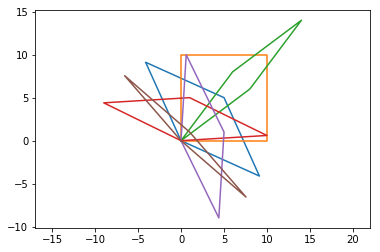

In [123]:
teken_ruit(5,5)
teken_ruit(10,10)
teken_ruit(14,14)
teken_ruit(1,5)
teken_ruit(5,1)
teken_ruit(1,1)

### Het bereik

In de voorgaande tekening zien we dat de groene ruit ongeveer maximaal uitgestrekt is. Op papier kan de arm zich uitstrekken tot twee maal de lengte van een zijde van de ruit. Dan liggen alle armen twee aan twee op elkaar en in elkaar verlengde.

Aangezien we de arm ook kunnen laten ronddraaien, zal de arm dus een bereik hebben dat afgebakend wordt door een cirkel.

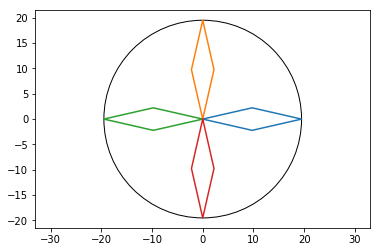

In [126]:
teken_ruit(19.5,0)
teken_ruit(0,19.5)
teken_ruit(-19.5,0)
teken_ruit(0,-19.5)

cirkel = plt.Circle((0, 0), 19.5, color='black', fill=False)
_= plt.gcf().gca().add_artist(cirkel)